# Welcome to ytree!

ytree is a yt extension for working with merger-tree data from different sources.

Below is a brief tutotial of working with merger-tree data in ytree.  For more information, see the full documentation at http://ytree.readthedocs.io/.

In [1]:
import ytree

## Loading data

Similar to yt, ytree uses a smart `load` command that will determine the type of data being provided.  Data is loaded into a structure called an `Arbor`, which is a collection of trees.

In [3]:
# consistent-trees
a = ytree.load("consistent_trees/tree_0_0_0.dat")

# rockstar halo catalogs
# a = ytree.load("rockstar/rockstar_halos/out_0.list")

# TreeFarm (the ytree merger-tree code for Gadget FoF/SUBFIND data)
# a = ytree.load("tree_farm/tree_farm_descendents/fof_subhalo_tab_000.0.h5")
# a = ytree.load("tree_farm/tree_farm_ancestors/fof_subhalo_tab_017.0.h5")

## Accessing trees

Trees are stored in the `trees` attribute associated with the `Arbor`.  They can also be accessed directly from the `Arbor`.

In [4]:
# How many trees are there?
print (a.size)

Loading tree roots: 100%|██████████| 5105985/5105985 [00:00<00:00, 565813825.88it/s]


327


A `TreeNode` is a single halo in a tree.

Fields for any tree node can be accessed in a dictionary-like fashion.

In [5]:
# Let's look at the first tree
print (a[0])

print ("mass: ", a[0]["mass"])
print ("redshift:", a[0]["redshift"])

TreeNode[12900]
mass:  657410071942446.1 Msun
redshift: 0.0


### Accessing members of a tree

The `tree` keyword will return all halos in the tree.

The `prog` keyword will return only the main progenitors of the tree.

In [6]:
print ("Halos in this tree: ", a[0]["tree"].size)

print ("Main progenitors of the tree: ", a[0]["prog"].size)

Halos in this tree:  83
Main progenitors of the tree:  48


### Field data for the tree

Field data for the whole tree or progenitors list can be accessed using the `tree` or `prog` keywords with the field name.

In [7]:
from matplotlib import pyplot
%matplotlib inline

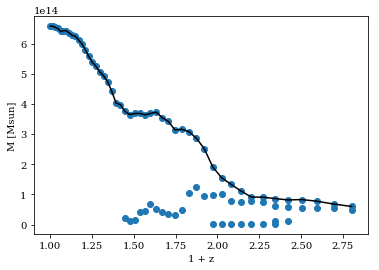

In [8]:
mytree = a[0]
pyplot.scatter(1 + mytree["tree", "redshift"], mytree["tree", "mass"])
pyplot.plot(1 + mytree["prog", "redshift"], mytree["prog", "mass"], color="black")
pyplot.xlabel("1 + z")
pyplot.ylabel("M [Msun]")

### Field data for all trees

For quick identification of trees, fields for the roots of all trees can be accessed by querying the ``Arbor`` like a dictionary.

In [9]:
import numpy as np

Getting root fields: 100%|██████████| 327/327 [00:00<00:00, 11621.33it/s]


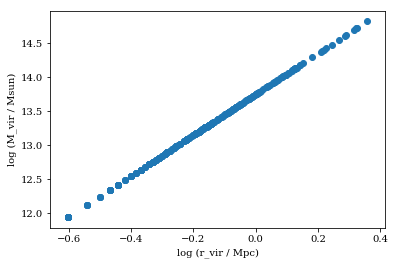

In [10]:
pyplot.scatter(np.log10(a["virial_radius"].to("Mpc")),
               np.log10(a["virial_mass"]))
pyplot.xlabel("log (r_vir / Mpc)")
pyplot.ylabel("log (M_vir / Msun)")

# ytree Documentation

For more information, see the full documentation at http://ytree.readthedocs.io/.